# IMDB using Transformer
---

**Author:** Aman Hussain  
**Description:** IMDB movie review classification using a pre-trained Transformer model
___

## Import Libraries

In [2]:
from fastai.text import *

## IMDB Sample Analysis

### Load Data

In [2]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/home/jupyter/.fastai/data/imdb_sample/texts.csv'),
 PosixPath('/home/jupyter/.fastai/data/imdb_sample/data_save.pkl')]

In [3]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


### Language Model Data

In [31]:
data_lm = TextDataBunch.from_csv(path, csv_name='texts.csv', text_cols=1)

In [32]:
data_lm.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative


**Using DataBlock API**

In [16]:
data_lm = (TextList.from_csv(path, csv_name='texts.csv', cols=1)
           .split_from_df(col=2)
           .label_for_lm()
           .databunch())

In [17]:
data_lm.show_batch()

idx,text
0,"! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk ! xxbos xxmaj this is a extremely well - made film . xxmaj the acting , script and camera - work are all first - rate . xxmaj the music is good , too , though it is"
1,"first loved him and then later hated him because he was xxunk . xxmaj he tries to explain to us the reasons he did what he did , but it 's really really so hard to xxunk . xxmaj such sad and unusual self destruction . xxmaj was it supposed to be funny ? xxmaj what was it all about really ? xxbos ( aka : xxup blood xxup castle"
2,"sleeping was funny . xxmaj the xxunk xxunk , and when xxmaj xxunk leaves , the xxunk stop . xxmaj it 's all harmless fun , good for kids and some adults . i think this movie will last for a while because it is rather good for a straight to xxmaj video and xxup dvd movie . xxmaj while the movie does seem a little odd and kind of"
3,"most people have said was rooting for the xxunk people to make it , specially the guy , he gave me a few cheap laughs here and there . i think this film could have really been something special instead it became what every other horror nowadays are ! xxmaj just boring and well not worth the money . \n \n if you are looking for a cheap scare"
4,"xxmaj the director is unable to xxunk showing the destruction of a major landmark ( xxmaj big xxmaj ben ) , but at least does n't xxunk xxunk on the xxunk of xxmaj london . \n \n xxmaj the victory of the xxmaj martians is hardly a surprise , despite the destruction by xxunk of some of their machines . xxmaj the xxmaj narrator , traveling about to seek"


In [53]:
data_lm.train_ds[0][0].data

array([  2,  18, 294,  20, ...,  15, 232, 137,  10])

In [54]:
data_lm.train_ds[0][0].text

"xxbos i read this xxmaj xxunk xxmaj xxunk play last year in xxunk grade . i was also forced to sit through this weak translation of it on screen . xxmaj let me tell you , it 's not a terrific play , it is easily surpassed , but man it deserves a much better shot . xxmaj the acting was really lacking , the scenery - honest to xxmaj god - looked like it was designed out of cardboard by a group of three - year - olds . xxmaj as if it could n't get worse , the sound quality is lousy ... there is this mind - numbing ' buzz ' whenever an actor speaks ... and i also could n't help but notice that the chemistry between xxmaj george and xxmaj emily , well , is non - existant . xxmaj the actors all seem very uncomfortable to be there . xxmaj there is no music . xxmaj it is in black and white , which would be xxup ok but it brings out the xxunk of it all the more . xxmaj in any case i think that if you 're going to make a point of seeing this movie , which i do n't really xxunk , then do n't aim

In [55]:
d = data_lm.train_ds

In [56]:
d.y

CategoryList (799 items)
negative,negative,negative,negative,negative
Path: /home/jupyter/.fastai/data/imdb_sample

In [57]:
d.y[0].obj, d.y[0].data

('negative', 0)

### Text Classifier

In [28]:
data_cls = TextClasDataBunch.from_csv(path, csv_name='texts.csv',
                                      vocab=data_lm.vocab, text_cols=1, label_cols=2)

In [29]:
data_cls.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",False
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",False
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk gaming experience in general . xxmaj with graphics",False
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",False
"xxbos \n \n i 'm sure things did n't exactly go the same way in the real life of xxmaj xxunk xxmaj xxunk as they did in the film adaptation of his book , xxmaj rocket xxmaj boys , but the movie "" xxmaj xxunk xxmaj sky "" ( an xxunk of the book 's title ) is good enough to stand alone . i have not read xxmaj",True


**Using DataBlock API**

In [36]:
data_cls = (TextList.from_csv(path, csv_name='texts.csv',cols=[0,1])
            .split_from_df(col=2)
            .label_from_df(cols=0)
            .databunch())

In [37]:
data_cls.show_batch()

text,target
"xxbos negative xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising",negative
"xxbos positive xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up",positive
"xxbos negative xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style",negative
"xxbos positive xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj xxunk . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj",positive
"xxbos positive xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk gaming experience in general . xxmaj with",positive


In [38]:
data_cls.train_ds[0][0].text

"xxbos negative xxmaj un - xxunk - believable ! xxmaj meg xxmaj ryan does n't even look her usual xxunk lovable self in this , which normally makes me forgive her shallow xxunk acting xxunk . xxmaj hard to believe she was the producer on this dog . xxmaj plus xxmaj kevin xxmaj kline : what kind of suicide trip has his career been on ? xxmaj xxunk ... xxmaj xxunk ! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk !"

In [39]:
data_cls.train_ds[0][0].data

array([   2,   76,    4, 4621, ...,    9,    4,    0,   51])

In [43]:
d = data_cls.train_ds

In [50]:
y = d.y[0]

## 1. IMDB Language Model

In [6]:
bs=24

### Load Data

In [3]:
path = untar_data(URLs.IMDB)
path

PosixPath('/home/jupyter/.fastai/data/imdb')

In [4]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/imdb/unsup'),
 PosixPath('/home/jupyter/.fastai/data/imdb/tmp_clas'),
 PosixPath('/home/jupyter/.fastai/data/imdb/test'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train'),
 PosixPath('/home/jupyter/.fastai/data/imdb/README'),
 PosixPath('/home/jupyter/.fastai/data/imdb/data_lm.pkl'),
 PosixPath('/home/jupyter/.fastai/data/imdb/models'),
 PosixPath('/home/jupyter/.fastai/data/imdb/tmp_lm'),
 PosixPath('/home/jupyter/.fastai/data/imdb/imdb.vocab')]

In [5]:
(path/'train').ls()

[PosixPath('/home/jupyter/.fastai/data/imdb/train/pos'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/neg'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train/unsupBow.feat')]

data_lm = (TextList.from_folder(path)
           .filter_by_folder(include=['train', 'test', 'unsup'])
           .random_split_by_pct(0.1)
           .label_for_lm()
           .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [6]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [7]:
data_lm.show_batch()

idx,text
0,"* out of xxrep 4 * ) constitutes his plea for tolerance toward xxmaj israeli and xxmaj palestinian immigrants in xxmaj america . xxmaj these unfortunate people are often punished in xxmaj america for the crimes of their counterparts in the war - ravaged xxmaj middle xxmaj east . xxmaj although "" xxmaj zohan "" advocates a lofty cause , xxmaj sandler does n't let his political agenda overshadow his"
1,"life from forces who are out to get him . xxmaj after an arduous trip across the xxmaj atlantic , the two settle down in xxmaj chicago to start a new life in xxmaj america . xxmaj when they fall on hard times , xxmaj darko decides to pimp his sister out for money while his dark past begins slowly but surely to catch up with him . \n \n"
2,"songs , that will make you on the edge of your seat . \n \n 8 / 10 xxbos xxmaj this is one strange movie , from floating images of xxmaj greek statues to flashy images in a picture frame . xxmaj this movie was not the most entertaining movie to sit down and watch , i had to wake my boyfriend up several times not to fall asleep"
3,this trash ! \n \n xxmaj overall i did have some laughs with this film but for all the wrong reasons : 1 ) xxmaj acting is beyond terrible and sets another all time low for future crap movies xxunk effects are not special at all and they look like they were designed and filmed by a bunch of college students with a £ 200 budget . xxunk irritates
4,"\n \n i suspect xxmaj takva has a satirical streak , once you imagine the xxunk 's lodge could be the current government of xxmaj turkey . \n \n xxmaj am i right ? xxmaj responses from xxmaj turkish members most welcome . xxbos xxmaj this is the story of a woman of great courage and compassion . xxmaj the acting was excellent . i , however ,"


## Train Language Model

In [26]:
learner = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.3)

learner.lr_find()

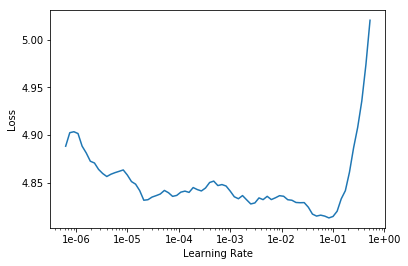

In [17]:
learner.recorder.plot(skip_end=15)

In [9]:
lr = 1e-3

learner.fit_one_cycle(3, lr, moms=[0.8, 0.7])

In [28]:
learner.save_encoder('imdb_lm_v1')

In [30]:
learner.load_encoder('imdb_lm_v1');

**Sanity Check**

In [31]:
learner.predict(text='This movie was ', n_words=100, temperature=0.75)

"This movie was  put on the face of the Sound School . Although the a and c Lavish Feelings were simply a complete color scheme , it are a film that builds on most of the violence and violence that books in the violin have in common . It does n't have the Promise , but it is just in a color package , as well is black and white to look up from and not be very mileage . The cinematography is good and the music is absolutely incredible . The film is"

### Failed Training

___

In [15]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


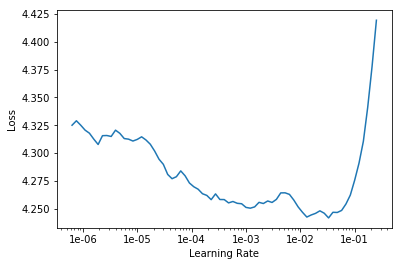

In [18]:
learner.recorder.plot(skip_end=15)

In [22]:
lr=1e-2

In [ ]:
learner.fit_one_cycle(cyc_len=1, max_lr=lr, moms=[0.8,0.7])

epoch,train_loss,valid_loss,accuracy,time


___

## 2. IMDB Text Classifier

In [4]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/imdb/unsup'),
 PosixPath('/home/jupyter/.fastai/data/imdb/tmp_clas'),
 PosixPath('/home/jupyter/.fastai/data/imdb/test'),
 PosixPath('/home/jupyter/.fastai/data/imdb/train'),
 PosixPath('/home/jupyter/.fastai/data/imdb/README'),
 PosixPath('/home/jupyter/.fastai/data/imdb/data_cls.pkl'),
 PosixPath('/home/jupyter/.fastai/data/imdb/data_lm.pkl'),
 PosixPath('/home/jupyter/.fastai/data/imdb/models'),
 PosixPath('/home/jupyter/.fastai/data/imdb/tmp_lm'),
 PosixPath('/home/jupyter/.fastai/data/imdb/imdb.vocab')]

### Load data

data_cls = (TextList.from_folder(path, vocab=data_lm.vocab)
            .split_by_folder(valid='test')
            .label_from_folder(classes=['pos', 'neg'])
            .databunch(bs=bs))
data_cls.save('data_cls.pkl')

In [7]:
data_cls = load_data(path, 'data_cls.pkl', bs=bs)
data_cls.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj pier xxmaj paolo xxmaj pasolini , or xxmaj pee - pee - pee as i prefer to call him ( due to his love of showing male genitals ) , is perhaps xxup the most overrated xxmaj european xxmaj marxist director - and they are thick on the ground . xxmaj how anyone can see "" art "" in this messy , cheap sex - romp concoction is",neg
"xxbos xxmaj to sum this documentary up in a few words is next to impossible . xxmaj every fiber of your body tells you that this is not happening right from the opening montage of rapid - fire images , through to the last shot of the clean up at xxmaj ground xxmaj zero , but every frame is real . xxmaj the story was thought up by two xxmaj",pos
"xxbos xxmaj within the realm of xxmaj science xxmaj fiction , two particular themes consistently elicit interest , were initially explored in the literature of a pre - cinematic era , and have since been periodically revisited by filmmakers and writers alike , with varying degrees of success . xxmaj the first theme , that of time travel , has held an unwavering fascination for fans of film , as",neg
"xxbos xxup baby xxup face is one of the better of the "" forgotten "" films before the code . xxmaj it was shown last night after the 1931 version of xxup waterloo xxup bridge on the xxup turner xxup classic xxup network , so i was able to watch the film as it is now with four plus minutes of it restored . \n \n xxmaj stanwyck is",pos


**Sanity Check**

In [23]:
data_lm.vocab.itos[:10], data_cls.vocab.itos[:10]

(['xxunk',
  'xxpad',
  'xxbos',
  'xxfld',
  'xxmaj',
  'xxup',
  'xxrep',
  'xxwrep',
  'the',
  '.'],
 ['xxunk',
  'xxpad',
  'xxbos',
  'xxfld',
  'xxmaj',
  'xxup',
  'xxrep',
  'xxwrep',
  'the',
  '.'])

### Train classifier

In [8]:
learner = text_classifier_learner(data_cls, arch=AWD_LSTM, drop_mult=0.5)

In [34]:
learner.load_encoder('imdb_lm_v1');

**Already looks good enough**

In [42]:
learner.show_results(10)

text,target,prediction
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos,pos
"xxbos * * xxmaj attention xxmaj spoilers * * \n \n xxmaj first of all , let me say that xxmaj rob xxmaj roy is one of the best films of the 90 's . xxmaj it was an amazing achievement for all those involved , especially the acting of xxmaj liam xxmaj neeson , xxmaj jessica xxmaj lange , xxmaj john xxmaj hurt , xxmaj brian xxmaj cox",pos,pos
"xxbos * ! ! - xxup spoilers - ! ! * \n \n xxmaj before i begin this , let me say that i have had both the advantages of seeing this movie on the big screen and of having seen the "" xxmaj authorized xxmaj version "" of this movie , remade by xxmaj stephen xxmaj king , himself , in 1997 . \n \n xxmaj both",pos,pos
"xxbos xxmaj by now you 've probably heard a bit about the new xxmaj disney dub of xxmaj miyazaki 's classic film , xxmaj laputa : xxmaj castle xxmaj in xxmaj the xxmaj sky . xxmaj during late summer of 1998 , xxmaj disney released "" xxmaj kiki 's xxmaj delivery xxmaj service "" on video which included a preview of the xxmaj laputa dub saying it was due out",pos,pos
"xxbos xxmaj titanic directed by xxmaj james xxmaj cameron presents a fictional love story on the historical setting of the xxmaj titanic . xxmaj the plot is simple , xxunk , or not for those who love plots that twist and turn and keep you in suspense . xxmaj the end of the movie can be figured out within minutes of the start of the film , but the love",pos,pos


In [43]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


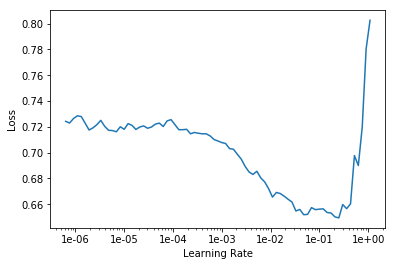

In [44]:
learner.recorder.plot()

In [45]:
lr=1e-2

In [47]:
learner.fit_one_cycle(1, max_lr=slice(1e-2/2.6**4, 1e-2), moms=[0.8,0.7])

epoch,train_loss,valid_loss,accuracy,time
1,0.529219,0.398120,0.821240,09:40


In [48]:
learner.save('imdb_cls_v0')

In [49]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


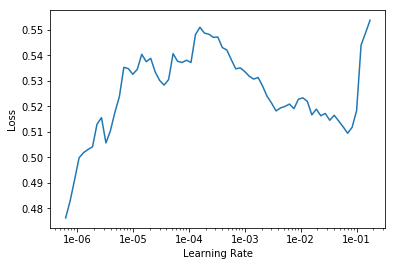

In [51]:
learner.recorder.plot(skip_end=10)

In [52]:
lr=1e-3

In [53]:
learner.fit_one_cycle(1, max_lr=slice(lr/2.6**4, lr), moms=[0.8,0.7])

epoch,train_loss,valid_loss,accuracy,time
1,0.523290,0.365193,0.838200,10:21


In [55]:
learner.save('imdb_cls_v1')

**Discriminative Training**

In [10]:
learner.load('imdb_cls_v1');

In [11]:
learner.freeze_to(-3)

In [12]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


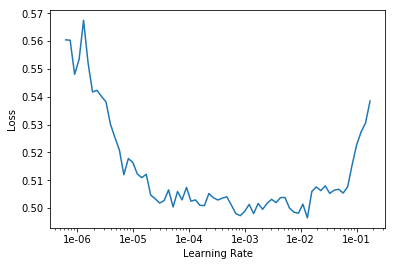

In [14]:
learner.recorder.plot(skip_end=15)

In [15]:
lr=1e-5

In [16]:
learner.fit_one_cycle(1, max_lr=slice(lr/2.6**4, lr), moms=[0.8,0.7])

epoch,train_loss,valid_loss,accuracy,time
1,0.541253,0.368053,0.835960,15:11


In [17]:
learner.save('imdb_cls_v2')

## Inference

In [19]:
learner.load('imdb_cls_v2');

**Validation Inference**

In [21]:
learner.show_results(rows=10)

text,target,prediction
"xxbos xxmaj there 's a sign on xxmaj the xxmaj lost xxmaj highway that says : \n \n * xxup major xxup spoilers xxup ahead * \n \n ( but you already knew that , did n't you ? ) \n \n xxmaj since there 's a great deal of people that apparently did not get the point of this movie , i 'd like to contribute",pos,pos
"xxbos xxmaj back in the mid / late 80s , an xxup oav anime by title of "" xxmaj bubblegum xxmaj crisis "" ( which i think is a military slang term for when technical equipment goes haywire ) made its debut on video , taking inspiration from "" xxmaj blade xxmaj runner "" , "" xxmaj the xxmaj terminator "" and maybe even "" xxmaj robocop "" , with",pos,pos
"xxbos ( xxmaj some spoilers included : ) \n \n xxmaj although , many commentators have called this film surreal , the term fits poorly here . xxmaj to quote from xxmaj encyclopedia xxmaj xxunk 's , surreal means : \n \n "" xxmaj fantastic or incongruous imagery "" : xxmaj one need n't explain to the unimaginative how many ways a plucky ten - year - old",pos,neg
"xxbos xxmaj if anyone ever assembles a compendium on modern xxmaj american horror that is truly worth it 's salt , there will * have * to be an entry for xxup sf xxmaj brownrigg 's xxunk xxunk in xxmaj asylum xxmaj horror . xxmaj every time i watch this movie i am impressed by the complete economy of the film , from the compact , totally self - contained",pos,neg
"xxbos xxmaj films belonging to the "" film noir "" genre usually contain similar elements : a "" deus ex machina "" plot twist that drives the main character headlong into bedlam , a pretty but psychotic girl , a handsome but psychotic thug , lots of money , lots of brutality , and usually a denouement in the desert . xxmaj think "" xxmaj high xxmaj sierra "" or",pos,pos
"xxbos ' xxmaj the xxmaj merchant of xxmaj venice ' is one of xxmaj shakespeare 's better - known plays and is still regularly performed in the theatre . xxmaj incredibly , however , this film would seem to be the first - ever xxmaj english - language version made for the cinema rather than television . xxmaj there were a number of versions made in xxmaj britain or xxmaj",pos,pos
"xxbos xxmaj tony xxmaj hawk 's xxmaj pro xxmaj skater 2x , is n't much different at all from the previous games ( excluding xxmaj tony xxmaj hawk 3 ) . xxmaj the only thing new that is featured in xxmaj tony xxmaj hawk 's xxmaj pro xxmaj skater 2x , is the new selection of levels , and tweaked out graphics . xxmaj tony xxmaj hawk 's xxmaj pro",pos,pos
"xxbos xxmaj wrestlemania 6 , is an entertaining xxmaj wrestlemania , if not an entirely successful one . xxmaj the xxmaj ultimate xxmaj challenge , is of course worth the price of admission alone , but once again as with a lot of the early xxmaj mania 's , there 's too much filler in between . xxmaj the crowd pops for almost everything , and as always , giving",pos,pos
"xxbos xxmaj the xxmaj merchant of xxmaj venice 8 / 10 \n \n ( xxmaj this review assumes a basic knowledge of the story and so may be thought of as containing spoilers to anyone unfamiliar with the plot . ) \n \n xxmaj as a film version of the famous xxmaj shakespeare play , xxmaj merchant of xxmaj venice does what few adaptations have done since xxmaj",pos,pos
"xxbos xxmaj warner xxmaj brothers tampered considerably with xxmaj american history in "" xxmaj big xxmaj trail "" director xxmaj raoul xxmaj walsh 's first - rate western "" xxmaj they xxmaj died with xxmaj their xxmaj boots xxmaj on , "" a somewhat inaccurate but wholly exhilarating biography of cavalry officer xxmaj george xxmaj armstrong xxmaj custer . xxmaj the film chronicles xxmaj custer from the moment that he",pos,pos


**Manual Inference**

In [22]:
learner.predict("Loved this movie. Will go again!")

(<fastai.core.Category at 0x7fd3ac6bb080>, tensor(0), tensor([0.9926, 0.0074]))

In [26]:
learner.predict("Really Bad movie.")

(<fastai.core.Category at 0x7fd3ad908400>, tensor(0), tensor([0.8797, 0.1203]))

In [24]:
learner.predict("The direction and acting was good. But the plot was really bad.")

(<fastai.core.Category at 0x7fd3ad908ac8>, tensor(0), tensor([0.8104, 0.1896]))

**Does not do well. Overfitting.**